Exercise Sheet 6 **Hodgkin-Huxley Model**

In [173]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

**1. Hodgkin-Huxley Model of Action Potential Generation**

In [144]:
#Convention reminder: positive current flows outside the cell,
# negative current flows inside the cell. Voltage is measured with respect
# to the outside of the cell.

In [145]:
#Defining our constant reversal potentials and conductances
Ena = 50 #mV
Ek = -77 #mV
Eleak = -54.387 #mV

gna = 120 #nSiemens
gk = 36 #nSiemens
gleak = .3 #nSiemens

In [146]:
#Defining rate functions for opening and close of sodium gating variable
# m and potassiun gating variable n and h
def an(V):
    return .01*(V+55)/(1-np.exp(-.1*(V+55)))

def bn(V):
    return .125*np.exp(-.0125*(V+65))

def am(V):
    return .1*(V+40)/(1-np.exp(-.1*(V+40)))

def bm(V):
    return 4*np.exp(-.0556*(V+65))

def ah(V):
    return .07*np.exp(-.05*(V+65))

def bh(V):
    return 1/(1+np.exp(-.1*(V+35)))

#Defining ODEs for our gating variables m, n, h
def dmdt(m,V):
    return am(V)*(1-m) - bm(V)*m

def dhdt(h,V):
    return ah(V)*(1-h) - bh(V)*h

def dndt(n,V):
        return an(V)*(1-n) - bn(V)*n
    
# #defining our euler for the gating variables
# def euler(dxdt, x0, tstop, dt):
#     # func is the first derivative of x(t) wrt t
#     # x0 is the value of x(t) at t = 0
#     steps = int(tstop/dt)
#     x = np.empty(steps)
#     x[0] = x0
    
#     for i in range(steps-1):
#         x[i+1] = x[i] + dxdt(x[i])*dt
        
#     return x

In [147]:
#1a
Cm = 1 #picoFarad
V0 = -65 #mV
m0 = .0529 #probability
h0 = .5961 #probability
n0 = .3177 #probability

Dt = .01 #time step multiplier, 1/100 of a ms

#choosing 50 ms to integrate/plot over
tmax = 50 #ms

In [148]:
#defining our Euler function for membrane potential
def dVdt(ina,ik,ileak,ie):
    return (-ina - ik - ileak + ie)/Cm


In [149]:
def euler_potential(v0, tstop, dt, ie):
    # Takes argument of all normal euler varibles, minus the starting 
    # membrane potential at (t=0)
    time = np.arange(0,tstop,dt)
    
    #making a list of v, m, n, and h, which will fill over time
    v = np.empty_like(time,dtype=object)
    m = np.empty_like(time,dtype=object)
    n = np.empty_like(time,dtype=object)
    h = np.empty_like(time,dtype=object)
     
    v[0] = v0
    m[0] = m0
    h[0] = h0
    n[0] = n0
    
    #and also the currents
    Ina = np.empty_like(time,dtype=object)
    Ik = np.empty_like(time,dtype=object)
    Ileak = np.empty_like(time,dtype=object)
    
    for i,t in enumerate(time):
        
        #Calculating our currents at each time step
        Ina[i] = (v[i]-Ena)*gna*h[i]*(m[i]**3)
        Ik[i] = (v[i]-Ek)*gk*(n[i]**4)
        Ileak[i] = gleak*(v[i]-Eleak)
        
        if t < time[-1]:
            #Updating our gating variables
            m[i+1] = m[i] + (am(v[i])*(1-m[i]) - bm(v[i])*m[i])*dt
            n[i+1] = n[i] + (an(v[i])*(1-n[i]) - bn(v[i])*n[i])*dt
            h[i+1] = h[i] + (ah(v[i])*(1-h[i]) - bh(v[i])*h[i])*dt

            #Then calculating the change in current-dependent membrane potential
            v[i+1] = v[i] + (dVdt(Ina[i],Ik[i],Ileak[i],ie))*dt

    return np.array((v,m,n,h,time,Ik,Ina))

membraneV = euler_potential(V0,tmax,Dt,0)

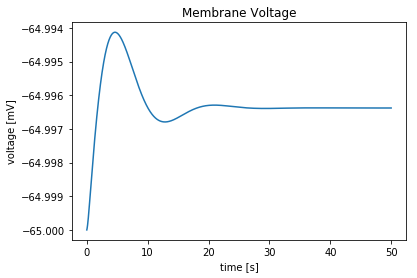

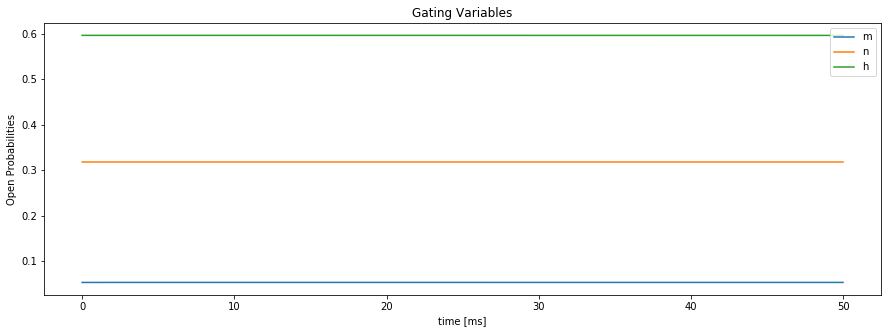

In [150]:
# Plotting voltage over time
time = membraneV[4]

plt.figure()
plt.plot(time,membraneV[0])
plt.xlabel('time [s]')
plt.ylabel('voltage [mV]')
plt.title('Membrane Voltage')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV[1], label = 'm')
plt.plot(time,membraneV[2],label = 'n')
plt.plot(time,membraneV[3],label = 'h')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('Open Probabilities')
plt.title('Gating Variables')
plt.show()

plt.show()

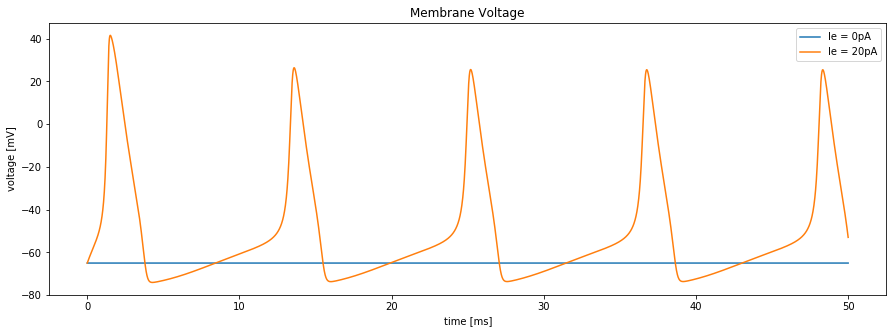

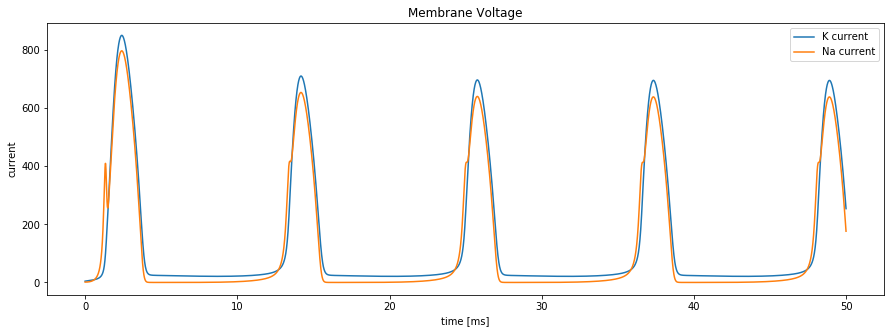

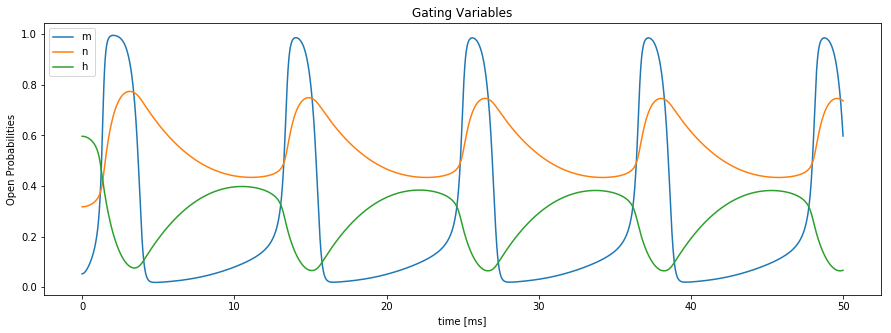

In [151]:
#1b
membraneV2 = euler_potential(V0,tmax,Dt,20)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV[0],label = 'Ie = 0pA')
plt.plot(time,membraneV2[0],label = 'Ie = 20pA')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('voltage [mV]')
plt.title('Membrane Voltage')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV2[5],label = 'K current')
plt.plot(time,-membraneV2[6],label = 'Na current')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('current')
plt.title('Membrane Voltage')

plt.figure(figsize=(15,5))
plt.plot(time,membraneV2[1], label = 'm')
plt.plot(time,membraneV2[2],label = 'n')
plt.plot(time,membraneV2[3],label = 'h')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('Open Probabilities')
plt.title('Gating Variables')
plt.show()

At the action potential, sodium gating variables m and h reach a mutual, simultaneous high just after the action potential, near the nernst potential of sodium, ~-60 mV (which is also very close to the resting potential of the neuron). They reach simultaneous low at the undershoot of action potential, when, biologically, a neuron is trying to reach its resting state and allows more positive ions in.

The potassium gating variable n has its highest point as the start of the current. Later highs occur when the voltage is well above the reversal potential of potassium and elicit and rise in potassium current. Its low point comes when the change in voltage is most negative and the gates detect it approaching the nernst potential of potassium, ~-97mV.

One could say the potassium current chases the sodium current.

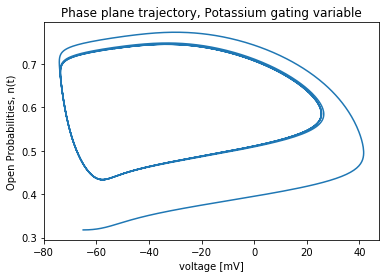

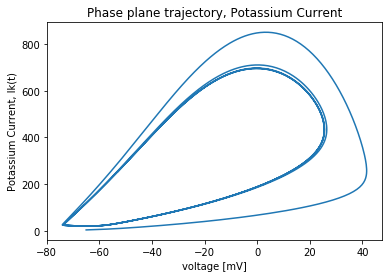

In [152]:
plt.plot(membraneV2[0],membraneV2[2])
plt.xlabel('voltage [mV]')
plt.ylabel('Open Probabilities, n(t)')
plt.title('Phase plane trajectory, Potassium gating variable')
plt.show()

plt.plot(membraneV2[0],membraneV2[5])
plt.xlabel('voltage [mV]')
plt.ylabel('Potassium Current, Ik(t)')
plt.title('Phase plane trajectory, Potassium Current')
plt.show()

These phase plane trajectories show us how the potassium current and its gating variable are changing with the voltage. Over time, the period of both the current and gating variable fall into the same phase. These graphs show us that, after the first few actional potential, the gating variable and potassium current reach steady phase state, and neither has to be as high as they were during the start of the applied curent for an action potential to be generated.

In [217]:
#1c

#Our 20 Ie values
Ie = np.linspace(0,20,20,endpoint=True)
firerate = np.empty_like(Ie)

#calculating over 1000ms
for i,pA in enumerate(Ie):
    #calculating V
    V = euler_potential(V0,1000,Dt,pA)
    firerate[i] = len(find_peaks(V[0],threshold=0)[0]) #Hz

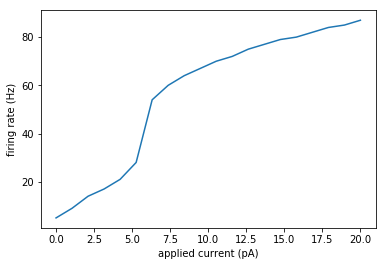

In [218]:
plt.plot(Ie,firerate)
plt.xlabel('applied current (pA)')
plt.ylabel('firing rate (Hz)')
plt.show()

Our rheobase is approximately 0 pA. The ISI take the distance between any two spikes as a firing rate, and doesn't account for changes in the firing over time as well as doing a spike count over 1 second, for example.

In [55]:
#1d 

#redefining our voltage function to accommodate a change in applied current
def euler_potential_d(v0, tstop, dt, ie):
    # Takes argument of all normal euler varibles, minus the starting 
    # membrane potential at (t=0)
    time = np.arange(0,tstop,dt)
    
    #making a list of v, m, n, and h, which will fill over time
    v = np.empty_like(time,dtype=object)
    m = np.empty_like(time,dtype=object)
    n = np.empty_like(time,dtype=object)
    h = np.empty_like(time,dtype=object)
     
    v[0] = v0
    m[0] = m0
    h[0] = h0
    n[0] = n0
    
    #and also the currents
    Ina = np.empty_like(time,dtype=object)
    Ik = np.empty_like(time,dtype=object)
    Ileak = np.empty_like(time,dtype=object)
    
    for i,t in enumerate(time):
        
        if t >= 5:
            ie = 0
        
        #Calculating our currents at each time step
        Ina[i] = (v[i]-Ena)*gna*h[i]*(m[i]**3)
        Ik[i] = (v[i]-Ek)*gk*(n[i]**4)
        Ileak[i] = gleak*(v[i]-Eleak)
        
        if t < time[-1]:
            #Updating our gating variables
            m[i+1] = m[i] + (am(v[i])*(1-m[i]) - bm(v[i])*m[i])*dt
            n[i+1] = n[i] + (an(v[i])*(1-n[i]) - bn(v[i])*n[i])*dt
            h[i+1] = h[i] + (ah(v[i])*(1-h[i]) - bh(v[i])*h[i])*dt

            #Then calculating the change in current-dependent membrane potential
            v[i+1] = v[i] + (dVdt(Ina[i],Ik[i],Ileak[i],ie))*dt

    return v,m,n,h,time,Ik,Ina

membraneV3 = euler_potential(V0,tmax,Dt,-5)

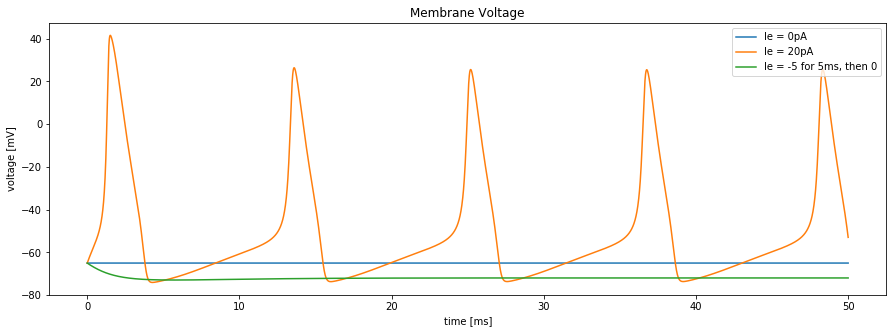

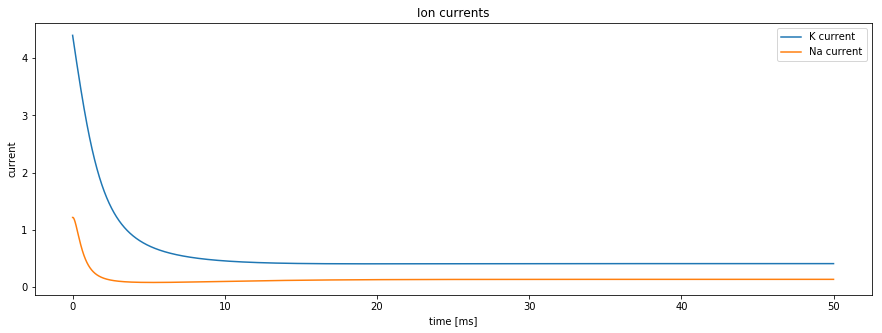

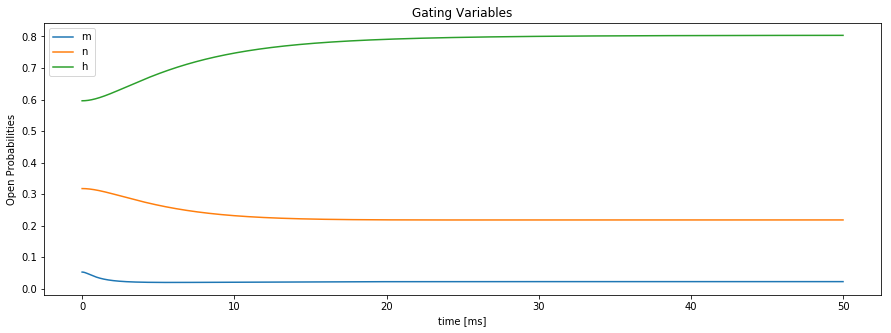

In [80]:
plt.figure(figsize=(15,5))
plt.plot(time,membraneV[0],label = 'Ie = 0pA')
plt.plot(time,membraneV2[0],label = 'Ie = 20pA')
plt.plot(time,membraneV3[0],label = 'Ie = -5 for 5ms, then 0')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('voltage [mV]')
plt.title('Membrane Voltage')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV3[5],label = 'K current')
plt.plot(time,-membraneV3[6],label = 'Na current')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('current')
plt.title('Ion currents')

plt.figure(figsize=(15,5))
plt.plot(time,membraneV3[1], label = 'm')
plt.plot(time,membraneV3[2],label = 'n')
plt.plot(time,membraneV3[3],label = 'h')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('Open Probabilities')
plt.title('Gating Variables')
plt.show()

A negative current elicits a drop the current for both ions and no action potential. We see that the voltage remains low even after the current has stopped being applied. The potassium current is then almost at zero because the membrane voltage is so close to potassium's nernst potential.

In [97]:
## 1e

#redefining our voltage function to accommodate a sinusoidal current
def euler_potential_e(v0, tstop, dt,vee):
    # Takes argument of all normal euler varibles, minus the starting 
    # membrane potential at (t=0)
    time = np.arange(0,tstop,dt)
    
    #making a list of v, m, n, and h, which will fill over time
    v = np.empty_like(time,dtype=object)
    m = np.empty_like(time,dtype=object)
    n = np.empty_like(time,dtype=object)
    h = np.empty_like(time,dtype=object)
     
    v[0] = v0
    m[0] = m0
    h[0] = h0
    n[0] = n0
    
    #and also the currents
    Ina = np.empty_like(time,dtype=object)
    Ik = np.empty_like(time,dtype=object)
    Ileak = np.empty_like(time,dtype=object)
    Ie = np.empty_like(time,dtype=object)
    
    for i,t in enumerate(time):
        
        #Calculating our currents at each time step
        Ina[i] = (v[i]-Ena)*gna*h[i]*(m[i]**3)
        Ik[i] = (v[i]-Ek)*gk*(n[i]**4)
        Ileak[i] = gleak*(v[i]-Eleak)
        Ie[i] = 2*np.sin(2*np.pi*(vee)*(t*1e-3))
        
        if t < time[-1]:
            #Updating our gating variables
            m[i+1] = m[i] + (am(v[i])*(1-m[i]) - bm(v[i])*m[i])*dt
            n[i+1] = n[i] + (an(v[i])*(1-n[i]) - bn(v[i])*n[i])*dt
            h[i+1] = h[i] + (ah(v[i])*(1-h[i]) - bh(v[i])*h[i])*dt

            #Then calculating the change in current-dependent membrane potential
            v[i+1] = v[i] + (dVdt(Ina[i],Ik[i],Ileak[i],Ie[i]))*dt

    return v,m,n,h,time,Ik,Ina,Ie



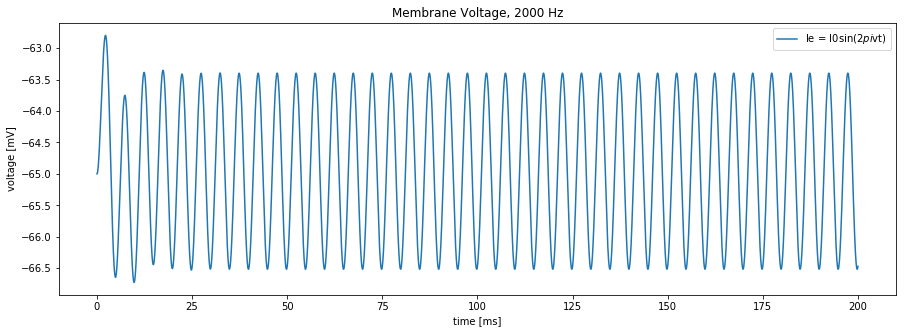

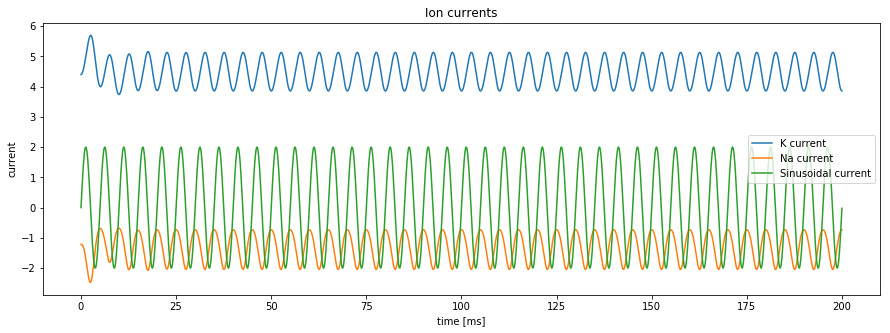

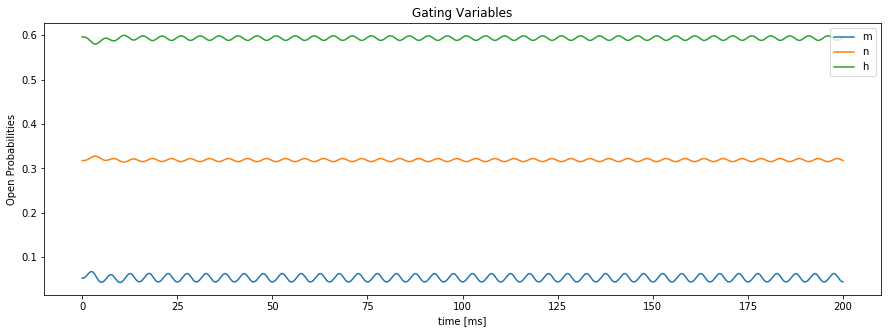

In [141]:
membraneV4 = euler_potential_e(V0,200,Dt,1/5e-3)
time = membraneV4[4]

plt.figure(figsize=(15,5))
# plt.plot(time,membraneV[0],label = 'Ie = 0pA')
# plt.plot(time,membraneV2[0],label = 'Ie = 20pA')
# plt.plot(time,membraneV3[0],label = 'Ie = -5 for 5ms, then 0')
plt.plot(time,membraneV4[0],label = 'Ie = I0sin(2$pi$vt)')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('voltage [mV]')
plt.title('Membrane Voltage, 2000 Hz')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV4[5],label = 'K current')
plt.plot(time,membraneV4[6],label = 'Na current')
plt.plot(time,membraneV4[7], label = 'Sinusoidal current')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('current')
plt.title('Ion currents')

plt.figure(figsize=(15,5))
plt.plot(time,membraneV4[1], label = 'm')
plt.plot(time,membraneV4[2],label = 'n')
plt.plot(time,membraneV4[3],label = 'h')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('Open Probabilities')
plt.title('Gating Variables')
plt.show()

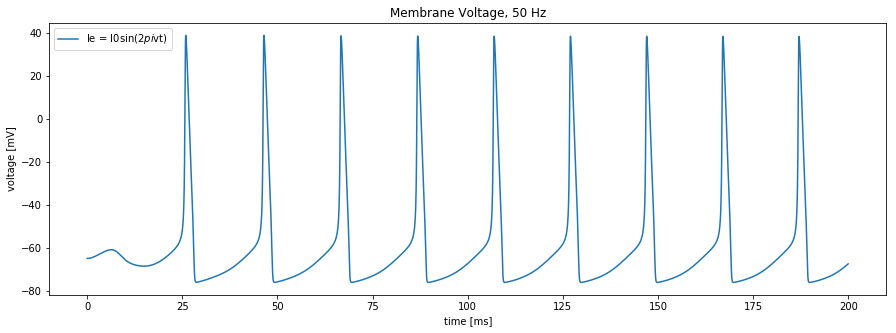

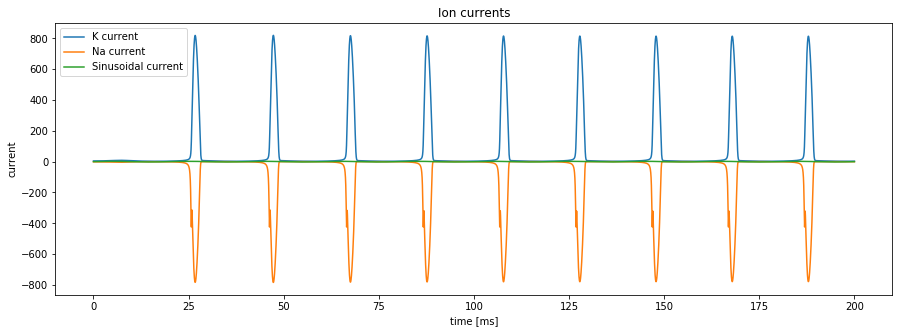

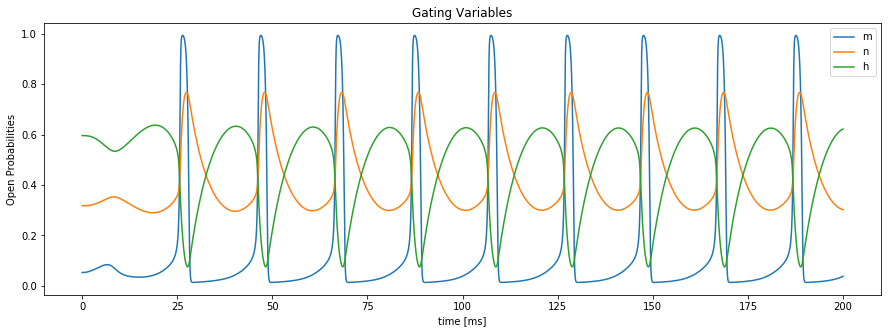

In [142]:
membraneV4 = euler_potential_e(V0,200,Dt,1/20e-3)
time = membraneV4[4]

plt.figure(figsize=(15,5))
# plt.plot(time,membraneV[0],label = 'Ie = 0pA')
# plt.plot(time,membraneV2[0],label = 'Ie = 20pA')
# plt.plot(time,membraneV3[0],label = 'Ie = -5 for 5ms, then 0')
plt.plot(time,membraneV4[0],label = 'Ie = I0sin(2$pi$vt)')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('voltage [mV]')
plt.title('Membrane Voltage, 50 Hz')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.figure(figsize=(15,5))
plt.plot(time,membraneV4[5],label = 'K current')
plt.plot(time,membraneV4[6],label = 'Na current')
plt.plot(time,membraneV4[7], label = 'Sinusoidal current')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('current')
plt.title('Ion currents')

plt.figure(figsize=(15,5))
plt.plot(time,membraneV4[1], label = 'm')
plt.plot(time,membraneV4[2],label = 'n')
plt.plot(time,membraneV4[3],label = 'h')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('Open Probabilities')
plt.title('Gating Variables')
plt.show()

For a very high v, neuron 'fires' at the same rate as v. For example, at which is 2000 Hz, we see the voltage reach the same peaks as our action potential in earlier problems, but without the classic rise, fall, undershoot. Here, we also observe oscillations in the gating variables and voltage around a mean, with the membrane voltage following changes in the sinusoidal current. The higher the oscillations, the less time the gating varaibles have to change and the lower their oscillation amplitude. 

At lower frequencies of the sinusoidal current, for example, 50 Hz, we see the form of an action potential arise in the membrane voltage, and the gating variable return to having the dynamic forms that we saw with a non-oscillating, direct applied current. 